# Reparametrization Library

This notebook contains multiple test curves and optimal reparametrizations, and test the reparametrization algorithm on a myriad of examples.

In [1]:
using Revise
using Reparam
using Plots
using Printf

In [2]:
line(t) = [t, 0]
graph_quad(t) = [t, t^2]
graph_exp(t) = [t, exp(-100(t-0.5)^2)]
circle(t) = [cos(2π*t), sin(2π*t)]
ellipse(t) = [cos(2π*t), 0.5sin(2π*t)]
infinity(t) = [cos(2π*t), sin(4π*t)]
spiral(t) = t * circle(t)


graph_exp1(t) = [t, exp(-100(t-0.25)^2)]
graph_exp2(t) = [t, exp(-100(t-0.75)^2)]

curves = Dict(
    "Line" => line,
    "Graph_Quad" => graph_quad,
    "Graph_Exp" => graph_exp,
    "Circle" => circle,
    "Ellipse" => ellipse,
    "Infinity" => infinity,
    "Spiral" => spiral
)

graph_exp2 (generic function with 1 method)

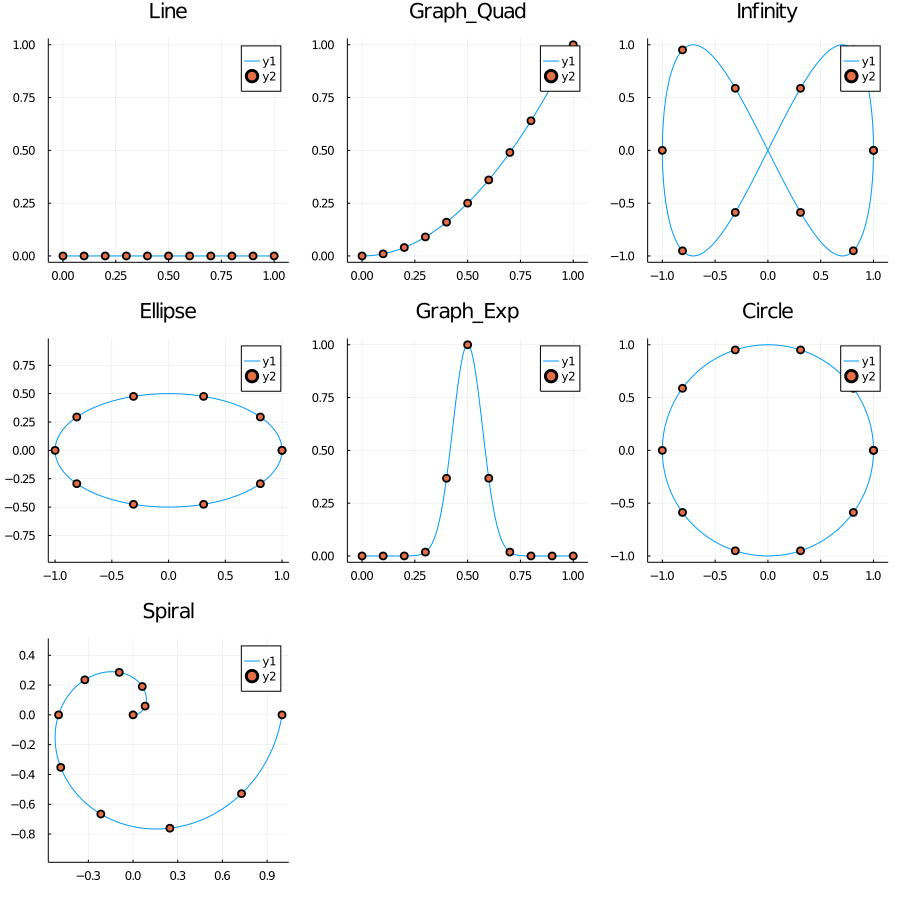

In [4]:
Tfine = 0:0.005:1
Tcoarse = 0:0.1:1

plots = []
for (name, func) in curves
    p = plot_curve(func, Tfine, title=name, aspect_ratio=:equal)
    plot_curve!(func, Tcoarse, seriestype=:scatter)
    push!(plots, p)
end
plot(plots..., size=(900, 900))

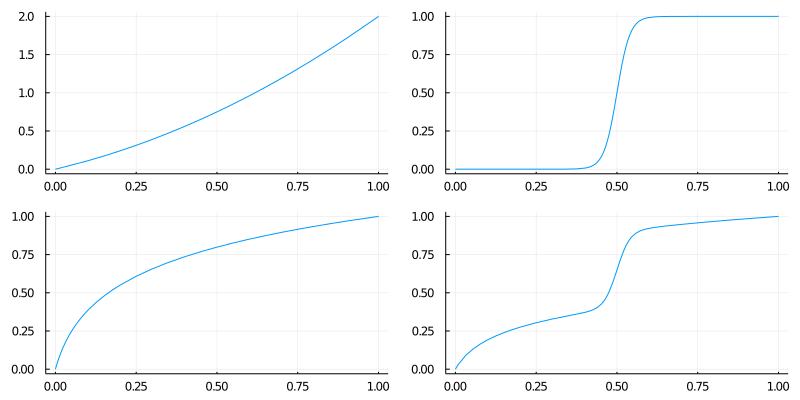

In [93]:
# Diffeomorphisms
quad(t) = t^2 + t
step(t) = (1 + exp(-2*25)) / (1 + exp(-2*25*(t-0.5)))
logdiff(t) = log(25*t + 1) / log(a + 1)

combined(t) = (step(t) + logdiff(t)) / 2


plots = []
for γ in [quad, step, logdiff, combined]
    p = plot(γ, 0, 1, legend=false)
    push!(plots, p)
end
plot(plots..., size=(800, 400))

In [7]:
shape_distance(line, graph_quad)

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 4.3392198638e-01 |                  |                  |                  |
|    1 | 4.3331754293e-01 | 1.8104029696e-01 | 1.2227929806e-02 | 3.0197597074e-03 | 1.3929772467e-03 |
|    2 | 4.3243594993e-01 | 6.0567135938e-01 | 3.3135973945e-02 | 6.0412617907e-03 | 2.0345195156e-03 |
|    3 | 4.3169827638e-01 | 1.1339290767e+00 | 5.5833017992e-02 | 7.1716526548e-03 | 1.7058562136e-03 |
|    4 | 4.3149770447e-01 | 8.1013280535e-01 | 2.9079635536e-02 | 2.6995600989e-03 | 4.6461132105e-04 |
 ----------------------------------------------------------------------------------


Reparam.ReparametrizationSolution{Reparam.var"#3#5"{typeof(line),Reparam.var"#cdt#4"{typeof(line)}},Reparam.var"#3#5"{typeof(graph_quad),Reparam.var"#cdt#4"{typeof(graph_quad)}},Reparam.OrthogonalProjector{Reparam.FourierSineBasisFunction,typeof(Reparam.l2_inner_product)}}(Reparam.var"#3#5"{typeof(line),Reparam.var"#cdt#4"{typeof(line)}}(line, Reparam.var"#cdt#4"{typeof(line)}(line)), Reparam.var"#3#5"{typeof(graph_quad),Reparam.var"#cdt#4"{typeof(graph_quad)}}(graph_quad, Reparam.var"#cdt#4"{typeof(graph_quad)}(graph_quad)), Reparam.OrthogonalProjector{Reparam.FourierSineBasisFunction,typeof(Reparam.l2_inner_product)}(Reparam.FourierSineBasisFunction[Reparam.FourierSineBasisFunction(1), Reparam.FourierSineBasisFunction(2), Reparam.FourierSineBasisFunction(3), Reparam.FourierSineBasisFunction(4), Reparam.FourierSineBasisFunction(5)], Reparam.l2_inner_product, 5), [0.43392198637961527, 0.4333175429257647, 0.43243594992821466, 0.43169827637605196, 0.4314977044695698], Function[Reparam.va

In [11]:
function shape_distance(c1, c2)
    q = Q_transform(c1)
    r = Q_transform(c2)
    
    res = reparametrize(q, r, FourierSineProjector(5), lsconfig=BacktrackConfig(c=0.8))
    return res
end


function compute_shape_dist_matrix(curves)
    res_matrix = Array{Any, 2}(undef, length(curves), length(curves))
    for (i, c1) in enumerate(curves)
        for (j, c2) in enumerate(curves)
            println()
            println("$c1 vs $c2")
            println()
            try
                res_matrix[i, j] = shape_distance(c1, c2)
            catch _; end
        end
    end
    
    D = Array{Float64, 2}(undef, length(curves), length(curves))
    for i in 1:length(curves)
        for j in 1:length(curves)
            if i == j
                D[i, i] = 0.
            else
                D[i, j] = res_matrix[i,j].errors[end]
            end
        end
    end
    return res_matrix, D
end
    

compute_shape_dist_matrix (generic function with 1 method)

In [38]:
R, D = compute_shape_dist_matrix(values(curves))


line vs line

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 0.0000000000e+00 |                  |                  |                  |

line vs graph_quad

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 4.3392198638e-01 |                  |                  |                  |
|    1 | 4.3331754293e-01 | 1.8104029696e-01 | 1.2227929806e-02 | 3.0197597074e-03 | 1.3929772467e-03 |
|    2 | 4.3243594993e-01 | 6.0567135938e-01 | 3.3135973945e-02 | 6.0412617907e-03 | 2.0345195156e-03 |
|    3 | 4.3169827638e-01 | 1.13

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 1.0250542787e+00 |                  |                  |                  |

ellipse vs spiral


graph_exp vs line

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 8.6536625501e-01 |                  |                  |                  |

graph_exp vs graph_quad

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------

LoadError: UndefRefError: access to undefined reference

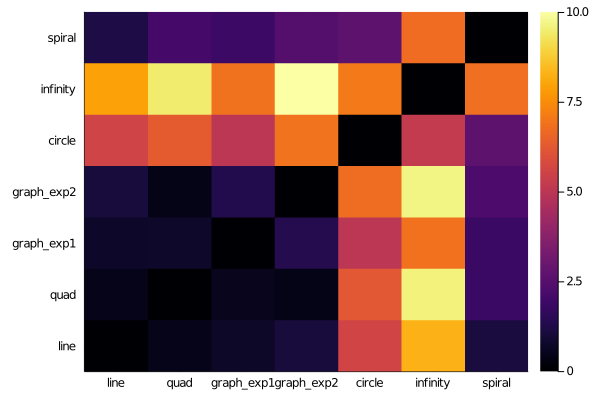

In [37]:
plot(D, seriestype=:heatmap,
    xticks=(1:7, keys(curves)),
    yticks=(1:7, keys(curves))
)

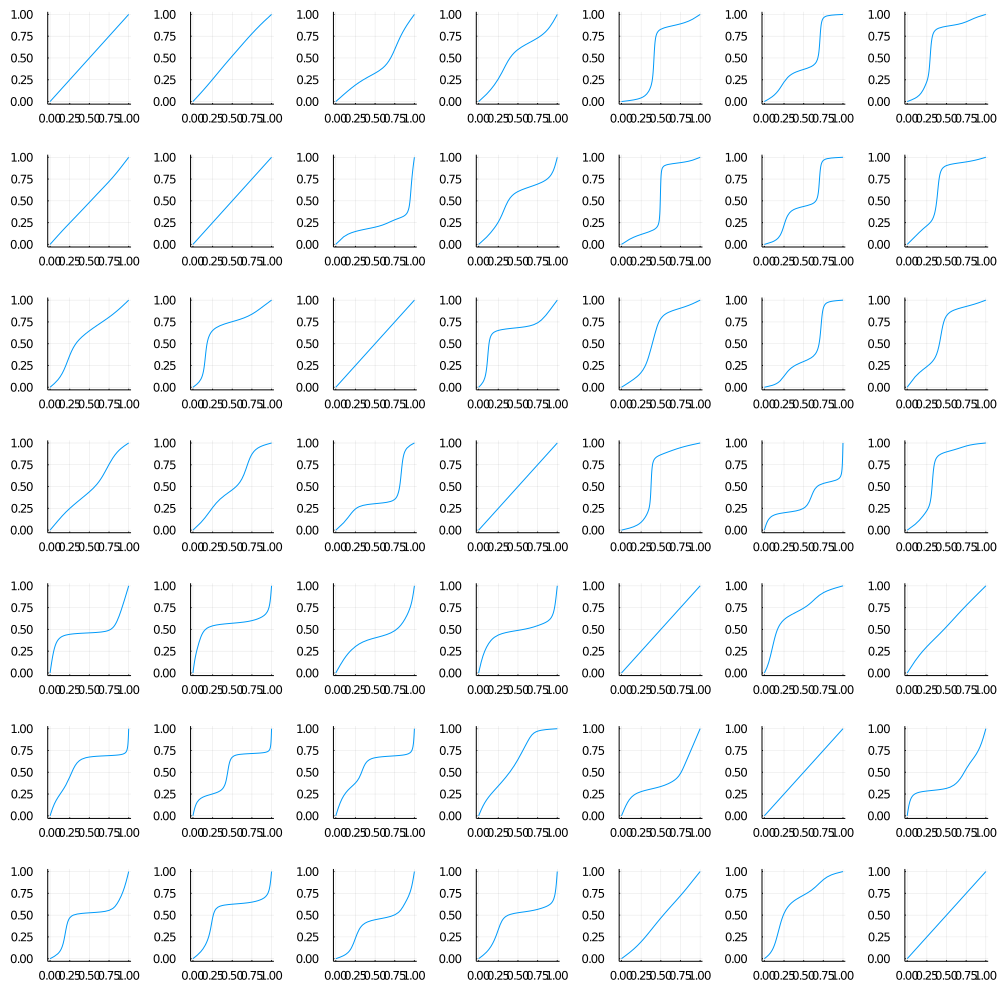

In [49]:
paramplots = []

for i in 1:length(curves)
    for j in 1:length(curves)
        if i == j
            p = plot(x -> x, 0, 1, legend=false)
            push!(paramplots, p)
        else
            γ = ∘(res_matrix[i, j].reparams...)
            p = plot(γ, 0, 1, legend=false)
            push!(paramplots, p)
        end
    end
end

plot(paramplots..., size=(1000, 1000))

In [31]:
D

7×7 Array{Float64,2}:
 0.0       0.431536  0.702297   1.03624   5.59302  8.27665  1.09776
 0.431743  0.0       0.511751   0.386809  6.20162  9.6161   1.83233
 0.708227  0.740793  0.0        1.34853   5.02221  6.8819   1.831
 1.03702   0.393551  1.31446    0.0       6.77022  9.68091  2.26192
 5.56225   6.32201   5.04055    6.93199   0.0      5.23057  2.66072
 7.93554   9.48574   6.89331   10.0198    7.06639  0.0      6.82547
 1.19451   2.08401   1.86513    2.42818   2.65981  6.76288  0.0

In [27]:
D = Array{Float64, 2}(undef, length(curves), length(curves))

for i in 1:length(curves)
    for j in 1:length(curves)
        if i == j
            D[i, i] = 0.
        else
            D[i, j] = res_matrix[i,j].errors[end]
        end
    end
end

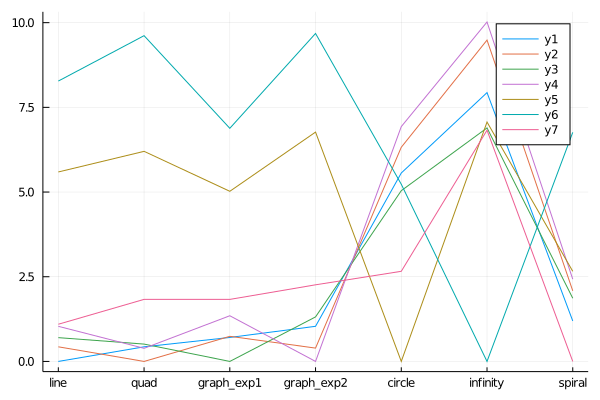

In [87]:
plot(D, xticks=(1:7, ["line", "quad", "graph_exp1", "graph_exp2", "circle", "infinity", "spiral"]), legend)
